In [186]:
'''
VARIABLE: METHOD OF DR

CONSTANT: N_EPOCHS, N_COMPONENTS, NOISE TYPE AND MAGNITUDE
          (30)      (30)          (SPECKLE, std=10)

'''

'\nVARIABLE: METHOD OF DR\n\nCONSTANT: N_EPOCHS, N_COMPONENTS, NOISE TYPE AND MAGNITUDE\n          (30)      (30)          (SPECKLE, std=10)\n\n'

In [187]:
# -- IMPORTS -- #
import math
import scipy
import numpy as np
from skimage import util
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

In [188]:
# -- TRAIN AND TEST DATA PREPARATION -- #
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_noisy = np.empty((len(x_test),28,28),dtype="float64")

std = 0.001
for i in range(len(x_test)):
    x_test_noisy[i] = util.random_noise(x_test[i],mode="gaussian",var=std**2)

45.02388794913101


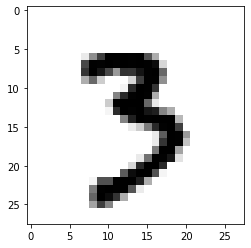

In [189]:
# -- OUTPUT SNR AND SAMPLE NOISY IMAGE -- #
p_signal = np.mean(x_test[30])
p_noise = std
snr = 10 * math.log(p_signal/p_noise,10)
print(snr)

plt.imshow(x_test_noisy[30],cmap=plt.cm.binary)
plt.show()

In [190]:
# -- CONVERTING DATA FOR INPUT INTO NEURAL NETWORK -- #
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((10000,28*28))
x_test_noisy = x_test_noisy.reshape((10000,28*28))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [191]:
# -- DIMENSIONALITY REDUCTION -- #
import dim_reduction
x_train0, x_test_noisy0 = x_train.copy(), x_test_noisy.copy()
x_train1, x_test_noisy1 = dim_reduction.apply(100, x_train, x_test_noisy, "PCA")
x_train2, x_test_noisy2 = dim_reduction.apply(100, x_train, x_test_noisy, "FA")
x_train3, x_test_noisy3 = dim_reduction.apply(100, x_train, x_test_noisy, "ICA")

In [192]:
# -- NEURAL NETWORK -- #
import neural_network
history0 = neural_network.fit(784, 100, x_train0, y_train, x_test_noisy0, y_test)
history1 = neural_network.fit(100, 100, x_train1, y_train, x_test_noisy1, y_test)
history2 = neural_network.fit(100, 100, x_train2, y_train, x_test_noisy2, y_test)
history3 = neural_network.fit(100, 100, x_train3, y_train, x_test_noisy3, y_test)


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.5685 - accuracy: 0.6187 - val_loss: 0.9876 - val_accuracy: 0.8154
Epoch 2/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.7508 - accuracy: 0.8396 - val_loss: 0.5550 - val_accuracy: 0.8704
Epoch 3/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.4930 - accuracy: 0.8783 - val_loss: 0.4149 - val_accuracy: 0.8963
Epoch 4/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.3951 - accuracy: 0.8972 - val_loss: 0.3526 - val_accuracy: 0.9094
Epoch 5/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.3449 - accuracy: 0.9076 - val_loss: 0.3166 - val_accuracy: 0.9164
Epoch 6/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.3136 - accuracy: 0.9151 - val_loss: 0.2933 - val_accuracy: 0.9229
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0896 - accuracy: 0.9757 - val_loss: 0.1091 - val_accuracy: 0.9675
Epoch 57/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0882 - accuracy: 0.9761 - val_loss: 0.1080 - val_accuracy: 0.9681
Epoch 58/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0869 - accuracy: 0.9765 - val_loss: 0.1072 - val_accuracy: 0.9684
Epoch 59/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0857 - accuracy: 0.9769 - val_loss: 0.1059 - val_accuracy: 0.9690
Epoch 60/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0843 - accuracy: 0.9771 - val_loss: 0.1055 - val_accuracy: 0.9693
Epoch 61/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0831 - accuracy: 0.9778 - val_loss: 0.1040 - val_accuracy: 0.9691
Epoch 62/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.0817 - accuracy: 0.9781

60000/60000 [==============================] - 0s 4us/step - loss: 0.2675 - accuracy: 0.9249 - val_loss: 0.2742 - val_accuracy: 0.9207
Epoch 11/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2527 - accuracy: 0.9283 - val_loss: 0.2623 - val_accuracy: 0.9240
Epoch 12/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2401 - accuracy: 0.9319 - val_loss: 0.2516 - val_accuracy: 0.9272
Epoch 13/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2292 - accuracy: 0.9348 - val_loss: 0.2438 - val_accuracy: 0.9290
Epoch 14/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2195 - accuracy: 0.9375 - val_loss: 0.2354 - val_accuracy: 0.9317
Epoch 15/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2107 - accuracy: 0.9400 - val_loss: 0.2280 - val_accuracy: 0.9350
Epoch 16/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2028 - accuracy: 0.9417 - val_loss: 0.2204 

60000/60000 [==============================] - 0s 4us/step - loss: 0.0749 - accuracy: 0.9795 - val_loss: 0.1259 - val_accuracy: 0.9655
Epoch 66/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0738 - accuracy: 0.9798 - val_loss: 0.1255 - val_accuracy: 0.9655
Epoch 67/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0728 - accuracy: 0.9801 - val_loss: 0.1250 - val_accuracy: 0.9657
Epoch 68/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0718 - accuracy: 0.9802 - val_loss: 0.1247 - val_accuracy: 0.9662
Epoch 69/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.0709 - accuracy: 0.9805 - val_loss: 0.1241 - val_accuracy: 0.9664
Epoch 70/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0700 - accuracy: 0.9809 - val_loss: 0.1240 - val_accuracy: 0.9672
Epoch 71/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.0690 - accuracy: 0.9809 - val_loss: 0.1246 

60000/60000 [==============================] - 0s 4us/step - loss: 0.2312 - accuracy: 0.9379 - val_loss: 0.3166 - val_accuracy: 0.9077
Epoch 21/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2234 - accuracy: 0.9397 - val_loss: 0.3120 - val_accuracy: 0.9090
Epoch 22/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2163 - accuracy: 0.9415 - val_loss: 0.3078 - val_accuracy: 0.9089
Epoch 23/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2098 - accuracy: 0.9434 - val_loss: 0.3043 - val_accuracy: 0.9091
Epoch 24/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.2038 - accuracy: 0.9452 - val_loss: 0.3018 - val_accuracy: 0.9092
Epoch 25/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.1982 - accuracy: 0.9467 - val_loss: 0.2995 - val_accuracy: 0.9096
Epoch 26/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.1930 - accuracy: 0.9478 - val_loss: 0.2973 

60000/60000 [==============================] - 0s 4us/step - loss: 0.0812 - accuracy: 0.9791 - val_loss: 0.2562 - val_accuracy: 0.9241
Epoch 76/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0801 - accuracy: 0.9794 - val_loss: 0.2567 - val_accuracy: 0.9237
Epoch 77/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0790 - accuracy: 0.9796 - val_loss: 0.2559 - val_accuracy: 0.9241
Epoch 78/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0779 - accuracy: 0.9800 - val_loss: 0.2565 - val_accuracy: 0.9242
Epoch 79/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0768 - accuracy: 0.9806 - val_loss: 0.2560 - val_accuracy: 0.9247
Epoch 80/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0758 - accuracy: 0.9808 - val_loss: 0.2564 - val_accuracy: 0.9244
Epoch 81/100
60000/60000 [==============================] - 0s 4us/step - loss: 0.0748 - accuracy: 0.9810 - val_loss: 0.2573 

60000/60000 [==============================] - 0s 5us/step - loss: 2.0496 - accuracy: 0.7552 - val_loss: 2.0406 - val_accuracy: 0.7508
Epoch 31/100
60000/60000 [==============================] - 0s 5us/step - loss: 2.0343 - accuracy: 0.7589 - val_loss: 2.0250 - val_accuracy: 0.7657
Epoch 32/100
60000/60000 [==============================] - 0s 5us/step - loss: 2.0187 - accuracy: 0.7653 - val_loss: 2.0092 - val_accuracy: 0.7696
Epoch 33/100
60000/60000 [==============================] - 0s 5us/step - loss: 2.0027 - accuracy: 0.7718 - val_loss: 1.9930 - val_accuracy: 0.7715
Epoch 34/100
60000/60000 [==============================] - 0s 5us/step - loss: 1.9863 - accuracy: 0.7749 - val_loss: 1.9763 - val_accuracy: 0.7801
Epoch 35/100
60000/60000 [==============================] - 0s 5us/step - loss: 1.9695 - accuracy: 0.7810 - val_loss: 1.9592 - val_accuracy: 0.7845
Epoch 36/100
60000/60000 [==============================] - 0s 5us/step - loss: 1.9523 - accuracy: 0.7866 - val_loss: 1.9420 

60000/60000 [==============================] - 0s 5us/step - loss: 0.9922 - accuracy: 0.8468 - val_loss: 0.9777 - val_accuracy: 0.8459
Epoch 86/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.9763 - accuracy: 0.8471 - val_loss: 0.9611 - val_accuracy: 0.8511
Epoch 87/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.9607 - accuracy: 0.8481 - val_loss: 0.9460 - val_accuracy: 0.8508
Epoch 88/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.9453 - accuracy: 0.8494 - val_loss: 0.9306 - val_accuracy: 0.8509
Epoch 89/100
60000/60000 [==============================] - 0s 6us/step - loss: 0.9302 - accuracy: 0.8501 - val_loss: 0.9150 - val_accuracy: 0.8526
Epoch 90/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.9153 - accuracy: 0.8510 - val_loss: 0.9007 - val_accuracy: 0.8521
Epoch 91/100
60000/60000 [==============================] - 0s 5us/step - loss: 0.9008 - accuracy: 0.8511 - val_loss: 0.8856 

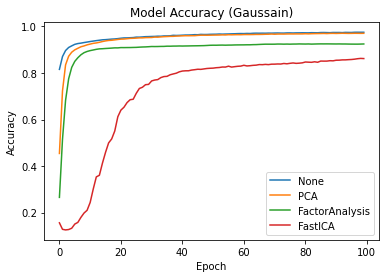

In [193]:
# -- OUTPUT PLOTS -- #
plt.plot(history0.history["val_accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.plot(history3.history["val_accuracy"])
plt.title("Model Accuracy (Gaussain)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["None", "PCA", "FactorAnalysis", "FastICA"],loc="lower right")
plt.show()